# Hybrid

In [ ]:
!pip install plotly

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
np.set_printoptions(suppress=True)
dataset = pd.read_csv('water-consumption-in-the-new-york-city-1.csv')
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [ ]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
xtr=X_train[:,0]
xte=X_test[:,0]
ytr=y_train[:,0]
yte=y_test[:,0]

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the Hybrid model on the Training set

In [ ]:
from xgboost import XGBRegressor
regressor1 = XGBRegressor(n_estimators=37)
regressor1.fit(X_train, y_train)

[08:08:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=37,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.linear_model import LassoCV
regressor2 = LassoCV()
regressor2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

## Predicting the Test set results

In [ ]:
y_pred1 = sc_y.inverse_transform(regressor1.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
y_pred2 = sc_y.inverse_transform(regressor2.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
y_pred=((y_pred1*1.91355)+(y_pred2*10))/12
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[197.87 198.  ]
 [136.51 137.  ]
 [134.23 135.  ]
 [122.68 121.  ]
 [118.9  119.  ]
 [141.08 136.  ]
 [188.27 191.  ]
 [144.99 148.  ]]


## Visualising the Training set results

In [ ]:
dt3={'year':xtr,'consumption':ytr}
dt3=pd.DataFrame(dt3)
yp2=((sc_y.inverse_transform(regressor1.predict(X_train))*1.91355)+(sc_y.inverse_transform(regressor2.predict(X_train))*10))/12
dt4={'year':xtr,'consumption':yp2}
dt4=pd.DataFrame(dt4)
dt3=dt3.sort_values(by=['year'])
dt4=dt4.sort_values(by=['year'])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=dt3.year,y=dt3.consumption,mode='markers',name='Original Points'))
fig.add_trace(go.Scatter(x=dt4.year, y=dt4.consumption, mode='lines',name='Traning Model'))
fig.update_layout(
    title={
        'text': "Water Consumption Prediction",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title="Consumption",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

## Visualising the Test set results

In [ ]:
dt1={'year':xte,'consumption':yte}
dt1=pd.DataFrame(dt1)
yp1=y_pred
dt2={'year':xte,'consumption':yp1}
dt2=pd.DataFrame(dt2)
dt1=dt1.sort_values(by=['year'])
dt2=dt2.sort_values(by=['year'])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=dt1.year,y=dt1.consumption,mode='markers',name='Original Points'))
fig.add_trace(go.Scatter(x=dt2.year, y=dt2.consumption, mode='lines',name='Traning Model'))
fig.update_layout(
    title={
        'text': "Water Consumption Prediction",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title="Consumption",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test, y_pred))
print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.mean(y_pred-y_test))

0.9927575632832144
0.9898605885965002
1.7500114624077803
5.751286894643703
-0.05912953181736036


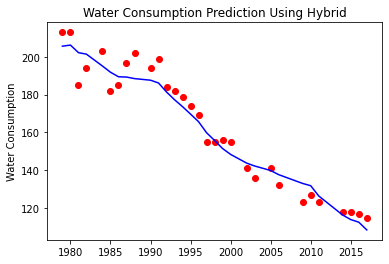

In [ ]:
plt.scatter(dt3.year, dt3.consumption, color = 'red')
plt.plot(dt4.year, dt4.consumption, color = 'blue')
plt.title('Water Consumption Prediction Using Hybrid')
plt.ylabel('Water Consumption')
plt.show()

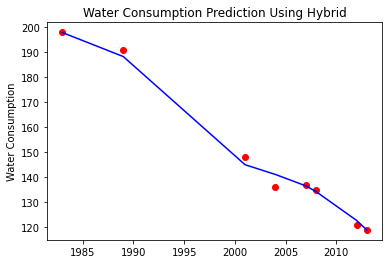

In [ ]:
plt.scatter(dt1.year, dt1.consumption, color = 'red')
plt.plot(dt2.year, dt2.consumption, color = 'blue')
plt.title('Water Consumption Prediction Using Hybrid')
plt.ylabel('Water Consumption')
plt.show()